In [ ]:
repo_name = "https://dagshub.com/vamsisaigarapati/bitcoin_price_pred_CSE574.mlflow"
repo_owner = 'vamsisaigarapati'
api_token = '0d66986d30f48a915d60b73c435bdae6ee103eb8'

In [19]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False

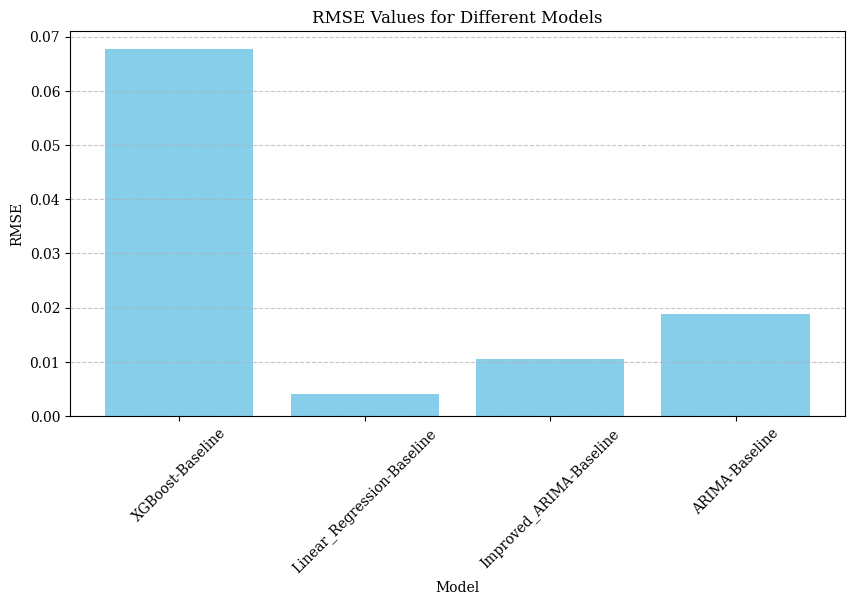

In [22]:
import os
import mlflow
import pandas as pd
import matplotlib.pyplot as plt

# Set up MLflow tracking URI for DagsHub
MLFLOW_TRACKING_URI = "https://dagshub.com/vamsisaigarapati/bitcoin_price_pred_CSE574.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'vamsisaigarapati'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '0d66986d30f48a915d60b73c435bdae6ee103eb8'

# Configure MLflow
mlflow.set_tracking_uri(uri=MLFLOW_TRACKING_URI)
mlflow.set_experiment("Bitcoin_Price_Prediction_CSE574")

# Fetch all previous runs
runs_df = mlflow.search_runs(order_by=["start_time DESC"])

# Extract model names and RMSE values
rmse_data = []
for _, row in runs_df.iterrows():
    run_id = row['run_id']
    run_info = mlflow.get_run(run_id)
    metrics = run_info.data.metrics
    
    if 'RMSE' in metrics:  # Ensure RMSE exists in metrics
        rmse_data.append({
            "Model": row['tags.mlflow.runName'],
            "RMSE": metrics['RMSE']
        })

# Convert to DataFrame
rmse_df = pd.DataFrame(rmse_data)

# Plot RMSE values
plt.figure(figsize=(10, 5))
plt.bar(rmse_df['Model'], rmse_df['RMSE'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Values for Different Models')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("rmse_comparision.png", dpi=300, bbox_inches="tight")
plt.show()


/var/folders/x5/7fmrypvd2mj6rc45kq6kv2lh0000gn/T/ipykernel_61827/224391710.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(df["Task"], fontsize=10)


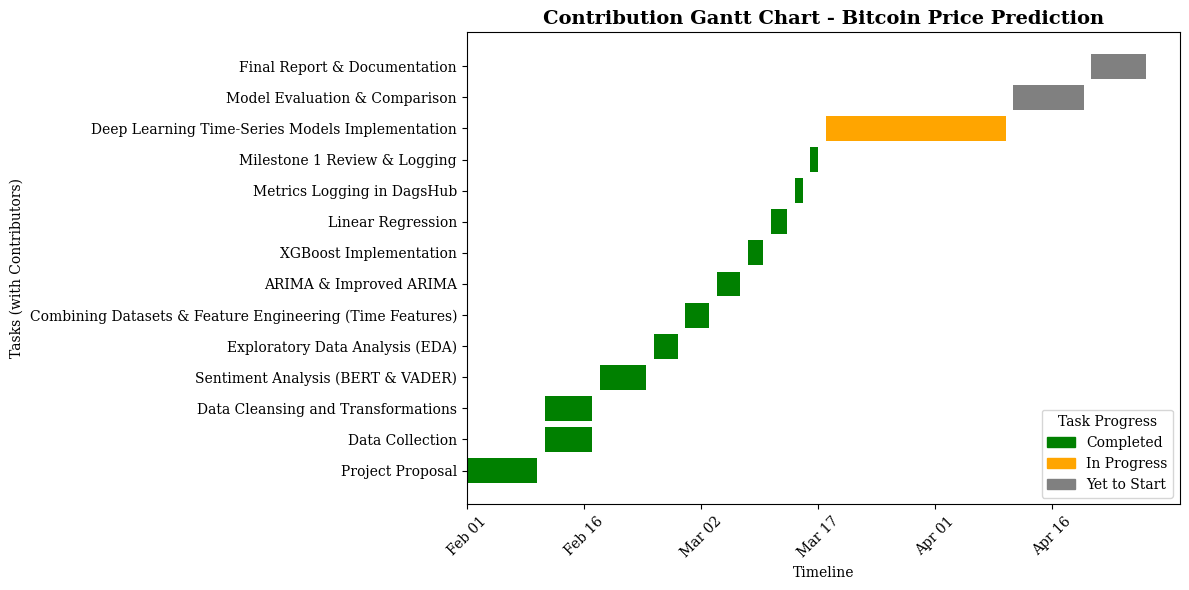

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Define project tasks with assigned team members and progress status
# tasks = [
#     {"Task": "Project Proposal (  VAMSI, VIGNESH, LOHITH  )", "Start": "2024-02-01", "End": "2024-02-10", "Status": "Completed"},
#     {"Task": "Data Collection (  VIGNESH, LOHITH  )", "Start": "2024-02-11", "End": "2024-02-17", "Status": "Completed"},
#     {"Task": "Data cleansing and Transformations (  VAMSI, VIGNESH  )", "Start": "2024-02-11", "End": "2024-02-17", "Status": "Completed"},
#     {"Task": "Sentiment Analysis (BERT & VADER) (  VAMSI  )", "Start": "2024-02-18", "End": "2024-02-24", "Status": "Completed"},
#     {"Task": "Exploratory Data Analysis (EDA) (  VAMSI, VIGNESH, LOHITH  )", "Start": "2024-02-25", "End": "2024-02-28", "Status": "Completed"},
#     {"Task": "Combining Datasets & Feature Engineering (Time features) (  VAMSI  )", "Start": "2024-02-29", "End": "2024-03-03", "Status": "Completed"},
#     {"Task": "ARIMA & Improved ARIMA (  VAMSI, VIGNESH  )", "Start": "2024-03-04", "End": "2024-03-07", "Status": "Completed"},
#     {"Task": "XGBoost Implementation (  LOHITH  )", "Start": "2024-03-08", "End": "2024-03-10", "Status": "Completed"},
#     {"Task": "Linear Regression (  VIGNESH  )", "Start": "2024-03-11", "End": "2024-03-13", "Status": "Completed"},
#     {"Task": "Metrics Logging in DagsHub (  VIGNESH  )", "Start": "2024-03-14", "End": "2024-03-15", "Status": "Completed"},
#     {"Task": "Milestone 1 Review & Logging (  VAMSI, LOHITH  )", "Start": "2024-03-16", "End": "2024-03-17", "Status": "Completed"},
#     {"Task": "Deep learning Time series Models impletentation (  VAMSI, VIGNESH, LOHITH  )", "Start": "2024-03-18", "End": "2024-04-10", "Status": "In Progress"},
#     {"Task": "Model Evaluation & Comparison (  VAMSI, VIGNESH, LOHITH  )", "Start": "2024-04-11", "End": "2024-04-20", "Status": "Yet to Start"},
#     {"Task": "Final Report & Documentation (  VAMSI, VIGNESH, LOHITH  )", "Start": "2024-04-21", "End": "2024-04-28", "Status": "Yet to Start"},
# ]
tasks = [
    {"Task": "Project Proposal", "Start": "2024-02-01", "End": "2024-02-10", "Status": "Completed"},
    {"Task": "Data Collection", "Start": "2024-02-11", "End": "2024-02-17", "Status": "Completed"},
    {"Task": "Data Cleansing and Transformations", "Start": "2024-02-11", "End": "2024-02-17", "Status": "Completed"},
    {"Task": "Sentiment Analysis (BERT & VADER)", "Start": "2024-02-18", "End": "2024-02-24", "Status": "Completed"},
    {"Task": "Exploratory Data Analysis (EDA)", "Start": "2024-02-25", "End": "2024-02-28", "Status": "Completed"},
    {"Task": "Combining Datasets & Feature Engineering (Time Features)", "Start": "2024-02-29", "End": "2024-03-03", "Status": "Completed"},
    {"Task": "ARIMA & Improved ARIMA", "Start": "2024-03-04", "End": "2024-03-07", "Status": "Completed"},
    {"Task": "XGBoost Implementation", "Start": "2024-03-08", "End": "2024-03-10", "Status": "Completed"},
    {"Task": "Linear Regression", "Start": "2024-03-11", "End": "2024-03-13", "Status": "Completed"},
    {"Task": "Metrics Logging in DagsHub", "Start": "2024-03-14", "End": "2024-03-15", "Status": "Completed"},
    {"Task": "Milestone 1 Review & Logging", "Start": "2024-03-16", "End": "2024-03-17", "Status": "Completed"},
    {"Task": "Deep Learning Time-Series Models Implementation", "Start": "2024-03-18", "End": "2024-04-10", "Status": "In Progress"},
    {"Task": "Model Evaluation & Comparison", "Start": "2024-04-11", "End": "2024-04-20", "Status": "Yet to Start"},
    {"Task": "Final Report & Documentation", "Start": "2024-04-21", "End": "2024-04-28", "Status": "Yet to Start"},
]
# Convert to DataFrame
df = pd.DataFrame(tasks)
df["Start"] = pd.to_datetime(df["Start"])
df["End"] = pd.to_datetime(df["End"])
df["Duration"] = (df["End"] - df["Start"]).dt.days

# Assign colors based on task status
status_colors = {"Completed": "green", "In Progress": "orange", "Yet to Start": "gray"}
df["Color"] = df["Status"].map(status_colors)

# Create Gantt Chart using Seaborn
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each task
for i, task in enumerate(df.itertuples()):
    ax.barh(task.Task, task.Duration, left=task.Start, color=task.Color)
    
# Customize chart
ax.set_xlabel("Timeline")
ax.set_ylabel("Tasks (with Contributors)")
ax.set_title("Contribution Gantt Chart - Bitcoin Price Prediction", fontsize=14, fontweight='bold')
ax.set_xticks(pd.date_range(start="2024-02-01", end="2024-04-30", freq="15D"))
ax.set_xticklabels(pd.date_range(start="2024-02-01", end="2024-04-30", freq="15D").strftime("%b %d"), rotation=45, fontsize=10)
ax.set_yticklabels(df["Task"], fontsize=10)

# Add legend
legend_patches = [Patch(color=color, label=label) for label, color in status_colors.items()]
ax.legend(handles=legend_patches, title="Task Progress", loc="lower right")

# Show chart
plt.tight_layout()
plt.savefig("contribution_gantt_chart.png", dpi=300, bbox_inches="tight")
plt.show()